In [1]:
# import modules
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import warnings

os.chdir("/Users/etmu9498/research/code/scripts")
import tc_metadata
import helper_fns
import make_plots_new_heights
import cloud_height

In [ ]:
# for this figure, basically recreate the top plot in figure 2 but with a wider padding and new labels! Then add arrows
# and text in powerpoint

In [2]:
# setup: choose the 9/29 eye pass 1 dataset
metadata = tc_metadata.all_data( tc='sam')
crl_path = metadata['um_crl_path']
crl_name = 'crl-sam-09-29-eye-1.nc'
dataset = 5

# load data and helpful values
os.chdir( crl_path)
crl_data = xr.open_dataset( crl_name)
xaxis_data = crl_data.in_situ_distance.values
dist0 = metadata[ 'in_situ_eyewall_dists'][dataset][ 0] # eyewall limit 0
dist1 = metadata[ 'in_situ_eyewall_dists'][dataset][ 1] # eyewall limit 1


In [3]:
# locally defined helper fn to make power plot!
def plot_power_ch1( data_path, data_file):
    warnings.filterwarnings("ignore")
    # get data
    os.chdir( data_path)
    crl_data = xr.open_dataset( data_file)

    # plot crl data using in situ x axis!
    # choose x axis
    xaxis = crl_data.in_situ_distance
    # plot things
    plt.pcolormesh(  xaxis, - crl_data.H_new, crl_data.power_new.transpose(), vmin = -30, vmax =-10)
    
    plt.ylabel( 'Height (km)')    
    plt.colorbar(label="CRL Return Power ( dBz)")
    
    plt.grid( 'on')
    plt.ylim( [ 0, crl_data.H_max + .1])

    ax = plt.gca()
    ax.set_facecolor('k')
    warnings.filterwarnings("default")

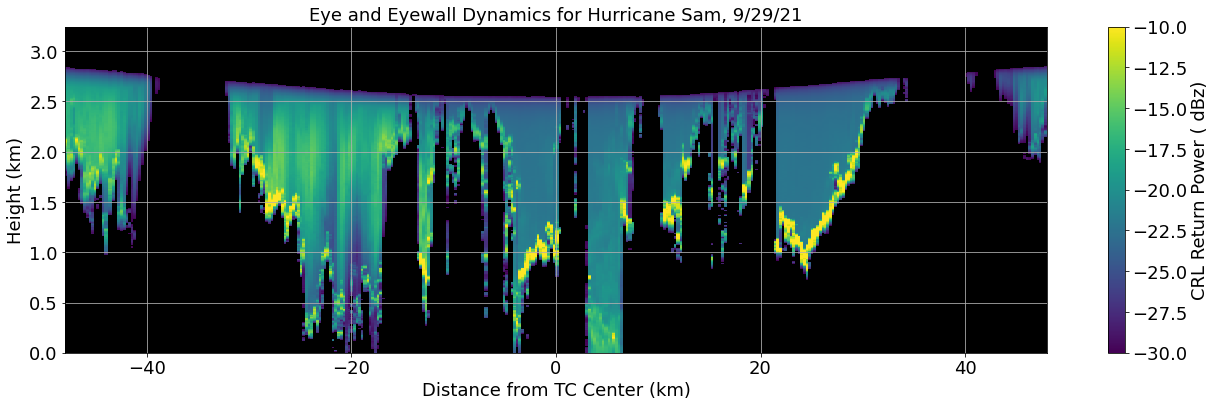

In [8]:
# Make plot 1: simple power ch 1 crl plot!

helper_fns.change_font_sizes(small=18, medium=18)

fig = plt.figure( figsize=(22, 6))

plot_power_ch1( crl_path, crl_name)


plt.title( "Eye and Eyewall Dynamics for Hurricane Sam, 9/29/21")
plt.xlabel("Distance from TC Center (km)")

plt.xlim( [ dist0 - 15, dist1 + 15])


os.chdir( "/Users/etmu9498/research/figures/csu-poster")
plt.savefig( "concept_fig.png", bbox_inches='tight', dpi=500 )